In [1]:
import pandas as pd

df = pd.read_csv('Data/fcc-forum-pageviews.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
print(len(df))
df.head()

1304


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [2]:
df = df[df['value'] >= df['value'].quantile(0.025)]
df = df[df['value'] <= df['value'].quantile(0.975)]

len(df)

1239

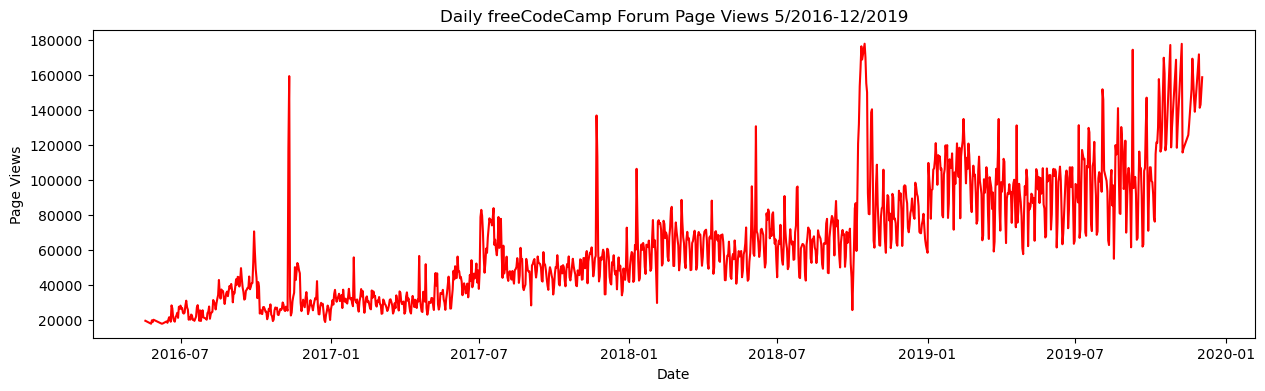

In [23]:
from matplotlib import pyplot as plt
import numpy as np

fig,ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.plot(df,c='crimson')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
#fig.savefig('/home/kevin/Descargas/line_plot.png')

In [4]:
df_bar = df.resample('M').mean()
df_bar['year']=df_bar.index.year
df_bar['month']=df_bar.index.strftime('%B')
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_bar["month"] = pd.Categorical(df_bar["month"],categories=months)

In [5]:
df_pivot = pd.pivot_table(df_bar,values='value',columns='month',index='year')

Text(0, 0.5, 'Average Page Views')

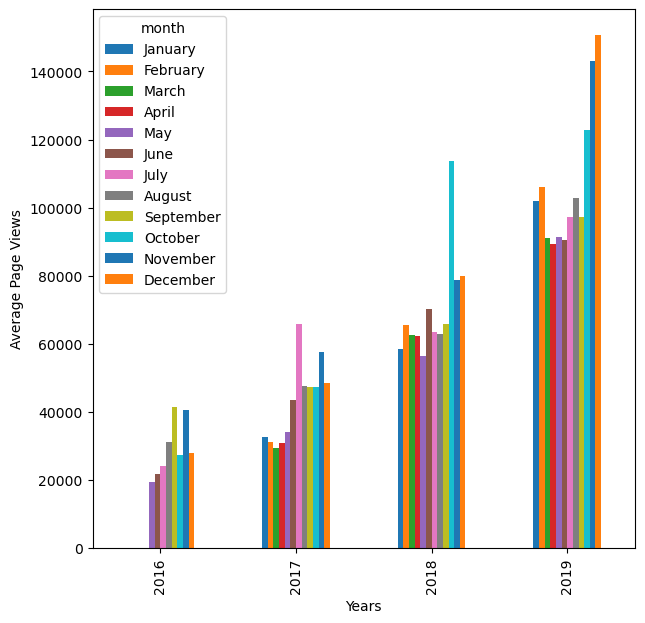

In [6]:
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 7)
# Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

In [9]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
list_m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/kevin/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

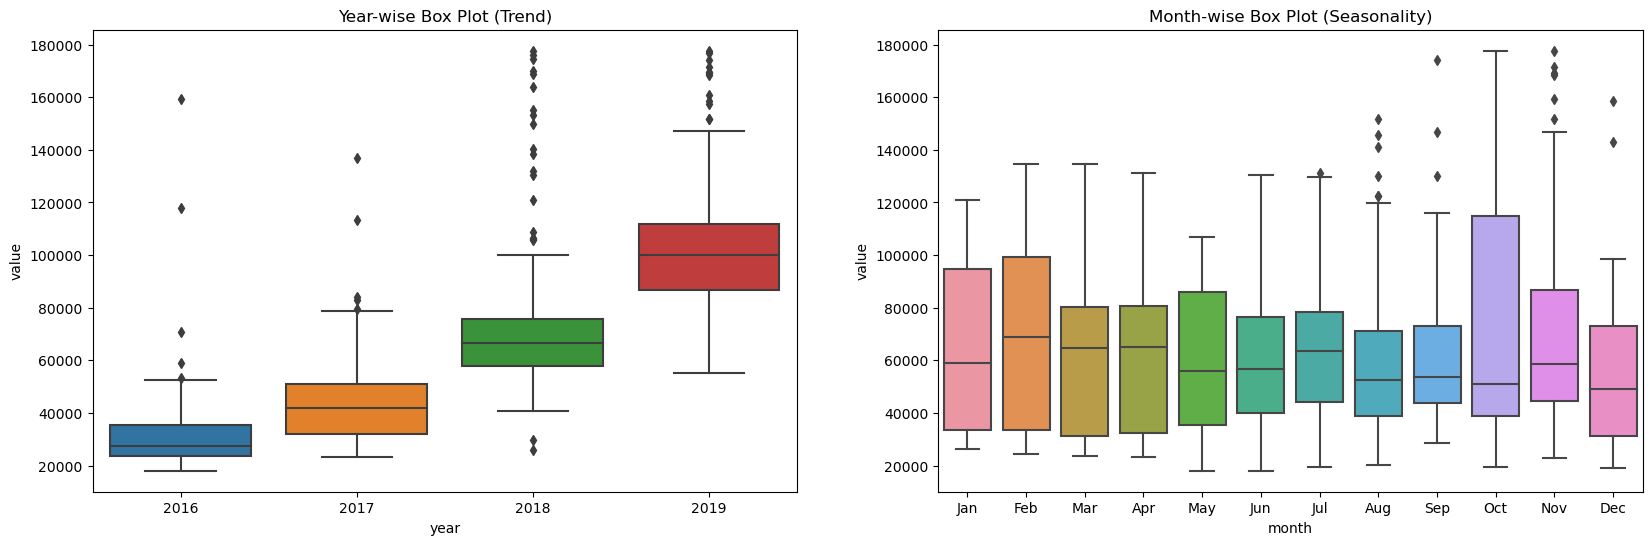

In [10]:
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
sns.boxplot(ax=axes[0], data=df_box,x="year",y='value')
axes[0].set_title('Year-wise Box Plot (Trend)')
sns.boxplot(ax=axes[1], data=df_box,x="month",y='value',order=list_m)
axes[1].set_title('Month-wise Box Plot (Seasonality)')